In [1]:
import pandas as pd
import numpy as np
print ("Hello Capstone project course")

Hello Capstone project course


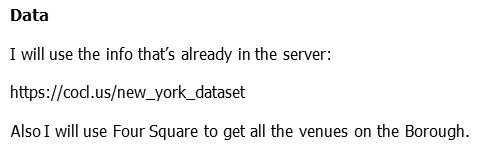



Data

I will use the info that’s already in the server: 

https://cocl.us/new_york_dataset

Also I will use Four Square to get all the venues on the Borough. 
